In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import tensorflow as tf
tf.__version__


'2.3.0'

# Extracting pixels from images

In [4]:
# cv2.imshow('image-resized window', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

In [14]:
path = 'homer_bart_1.zip'

In [17]:
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [23]:
directory = 'homer_bart_1'

# Prints file namens
# os.listdir(directory)

# Join file names with the name of the directory
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files[0:6])

['homer_bart_1/.DS_Store', 'homer_bart_1/bart1.bmp', 'homer_bart_1/bart10.bmp', 'homer_bart_1/bart100.bmp', 'homer_bart_1/bart101.bmp', 'homer_bart_1/bart102.bmp']


In [24]:
type(files)

list

### Change size of the pictures

In [26]:
height, width = 128, 128

In [131]:
images = []
classes = []

In [132]:
for image_path in files:
    #print(image_path)
    try:
        image = cv2.imread(image_path)
        (H, W) = image.shape[:2]
    except: 
        continue
        
    image = cv2.resize(image, (width, height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Use `ravel()` to flatten the array
    image = image.ravel()
    
    images.append(image)
    
    
    image_name = os.path.basename(os.path.normpath(image_path))
    
    if image_name.startswith('b'):
        class_name = 0
    else:
        class_name = 1
    classes.append(class_name)
    print(class_name)
    
    
    
#     print(type(image))
#     print(image.shape)
#     print(type(image))
#     plt.imshow(image)
#     print(image.shape)
#     plt.show();


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [133]:
image.shape

(16384,)

In [134]:
type(image)

numpy.ndarray

In [135]:
images[1]

array([254, 254, 254, ..., 254, 254, 254], dtype=uint8)

In [136]:
len(classes)

269

In [137]:
set(classes)

{0, 1}

In [138]:
type(images), type(classes)

(list, list)

## Set X and y for NN
We have to transform lists to ndarrays

In [139]:
# Transform list to numpy.ndarray
X = np.asarray(images)
y = np.asarray(classes)

In [140]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [141]:
X.shape

(269, 16384)

In [142]:
y.shape

(269,)

### Check the images

In [144]:
X[0].reshape(width, height).shape


(128, 128)

### Visualise the first image

In [151]:
cv2.imshow('', X[0].reshape(width, height))
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Count classes
-> inbalanced dataset

In [152]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

/Users/magdalenablum-oeste/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


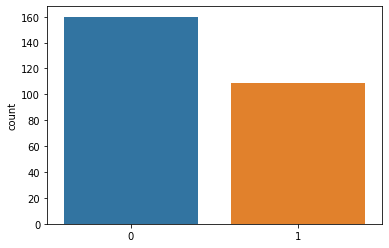

In [154]:
sns.countplot(y);

In [155]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))